In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
census_data=pd.read_csv('census2004_2024.csv')

In [5]:
census_data.info()
census_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Name                                  454 non-null    object 
 1   Year                                  454 non-null    int64  
 2   Life.Expectancy.at.Birth..Both.Sexes  449 non-null    float64
 3   Life.Expectancy.at.Birth..Males       449 non-null    float64
 4   Life.Expectancy.at.Birth..Females     449 non-null    float64
 5   Under.Age.5.Mortality..Both.Sexes     449 non-null    float64
 6   Under.Age.5.Mortality..Males          449 non-null    float64
 7   Under.Age.5.Mortality..Females        449 non-null    float64
 8   Subregion                             450 non-null    object 
 9   Region                                450 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 35.6+ KB


,Name,Year,Life.Expectancy.at.Birth..Both.Sexes,Life.Expectancy.at.Birth..Males,Life.Expectancy.at.Birth..Females,Under.Age.5.Mortality..Both.Sexes,Under.Age.5.Mortality..Males,Under.Age.5.Mortality..Females,Subregion,Region
0,Afghanistan,2004,46.7,45.6,47.8,208.6,215.5,201.4,South-Central Asia,Asia
1,Albania,2004,75.3,72.6,78.2,19.9,21.0,18.7,Southern Europe,Europe
2,Algeria,2004,73.7,72.9,74.7,37.2,39.0,35.3,Northern Africa,Africa
3,American Samoa,2004,70.8,68.3,73.4,17.7,20.6,14.6,Polynesia,Oceania
4,Andorra,2004,81.3,79.8,82.9,5.8,4.9,6.8,Southern Europe,Europe


In [6]:
census_data.rename(columns={'Life.Expectancy.at.Birth..Both.Sexes':'LEBS','Life.Expectancy.at.Birth..Males':'LEM','Life.Expectancy.at.Birth..Females':'LEF','Under.Age.5.Mortality..Both.Sexes':'UMBS','Under.Age.5.Mortality..Males':'UMM','Under.Age.5.Mortality..Females':'UMF'}, inplace=True)


In [7]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       454 non-null    object 
 1   Year       454 non-null    int64  
 2   LEBS       449 non-null    float64
 3   LEM        449 non-null    float64
 4   LEF        449 non-null    float64
 5   UMBS       449 non-null    float64
 6   UMM        449 non-null    float64
 7   UMF        449 non-null    float64
 8   Subregion  450 non-null    object 
 9   Region     450 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 35.6+ KB


In [8]:
census_data['LEBS']=census_data['LEBS'].fillna(census_data['LEBS'].mean())
census_data['LEM']=census_data['LEM'].fillna(census_data['LEM'].mean())
census_data['LEF']=census_data['LEF'].fillna(census_data['LEF'].mean())
census_data['UMBS']=census_data['UMBS'].fillna(census_data['UMBS'].mean())
census_data['UMM']=census_data['UMM'].fillna(census_data['UMM'].mean())
census_data['UMF']=census_data['UMF'].fillna(census_data['UMF'].mean())

In [9]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       454 non-null    object 
 1   Year       454 non-null    int64  
 2   LEBS       454 non-null    float64
 3   LEM        454 non-null    float64
 4   LEF        454 non-null    float64
 5   UMBS       454 non-null    float64
 6   UMM        454 non-null    float64
 7   UMF        454 non-null    float64
 8   Subregion  450 non-null    object 
 9   Region     450 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 35.6+ KB


In [10]:
census_data=census_data.dropna()

In [11]:
census_2024=pd.DataFrame(census_data.loc[census_data['Year']==2024]).copy()

In [12]:
census_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 227 to 453
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       225 non-null    object 
 1   Year       225 non-null    int64  
 2   LEBS       225 non-null    float64
 3   LEM        225 non-null    float64
 4   LEF        225 non-null    float64
 5   UMBS       225 non-null    float64
 6   UMM        225 non-null    float64
 7   UMF        225 non-null    float64
 8   Subregion  225 non-null    object 
 9   Region     225 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 19.3+ KB


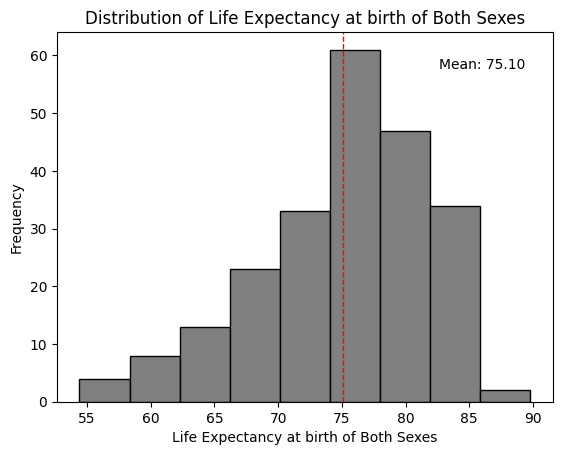

In [13]:
#Distribution of Life expectancy at birth both sexes
census_2024['LEBS'].hist(grid=False, bins=9,edgecolor='black',color="grey")
plt.axvline(census_2024['LEBS'].mean(), color='red', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(census_2024['LEBS'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(census_2024['LEBS'].mean()))
plt.xlabel('Life Expectancy at birth of Both Sexes')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy at birth of Both Sexes')
plt.show()


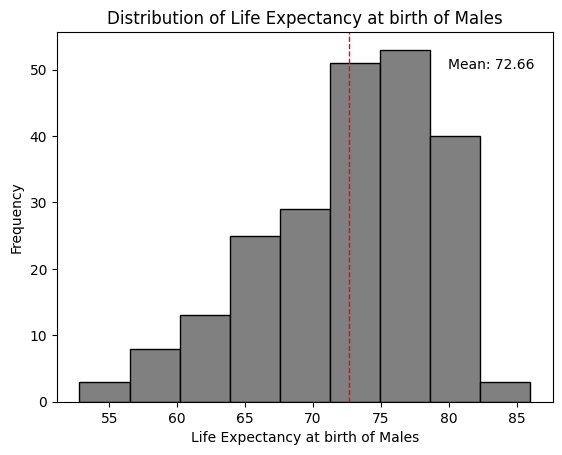

In [14]:
#Distribution of Life expectancy at birth both sexes
census_2024['LEM'].hist(grid=False, bins=9,edgecolor='black',color="grey")
plt.axvline(census_2024['LEM'].mean(), color='red', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(census_2024['LEM'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(census_2024['LEM'].mean()))
plt.xlabel('Life Expectancy at birth of Males')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy at birth of Males')
plt.show()

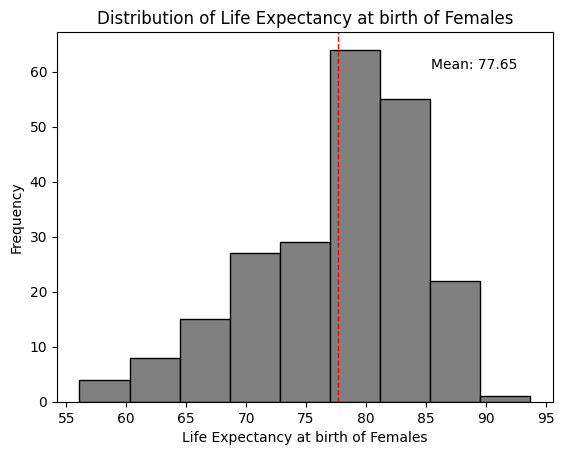

In [15]:
#Distribution of Life expectancy at birth both sexes
census_2024['LEF'].hist(grid=False, bins=9,edgecolor='black',color="grey")
plt.axvline(census_2024['LEF'].mean(), color='red', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(census_2024['LEF'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(census_2024['LEF'].mean()))
plt.xlabel('Life Expectancy at birth of Females')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy at birth of Females')
plt.show()

C:\Users\xyzsi\AppData\Local\Temp\ipykernel_7916\2686169805.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


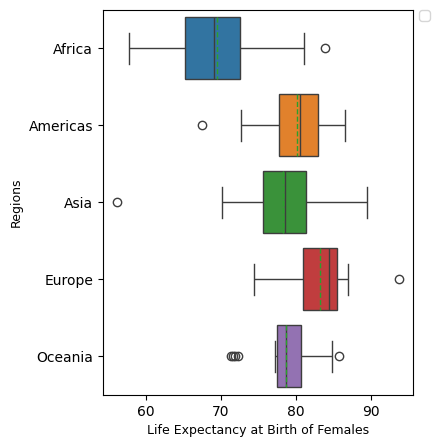

C:\Users\xyzsi\AppData\Local\Temp\ipykernel_7916\2686169805.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


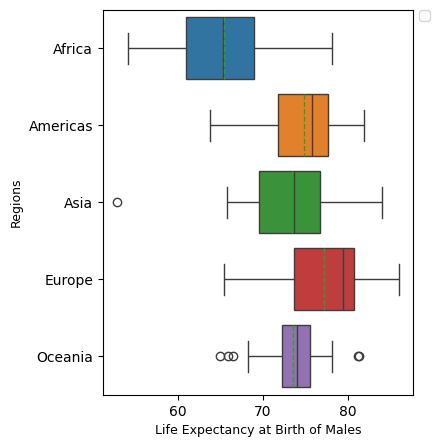

In [16]:
#boxplot showing differences of life expectancy at birth of females between regions
plt.figure(figsize=(4,5)) 
ax= sns.boxplot(x='LEF',y='Region' ,data=census_2024.sort_values(by="Region"),hue="Region",showmeans=True, meanline=True,dodge=False)
plt.xlabel("Life Expectancy at Birth of Females", fontsize=9)
plt.ylabel("Regions", fontsize=9)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#boxplot showing differences of life expectacny at birth of males between regions 
plt.figure(figsize=(4,5)) 
ax = sns.boxplot(x='LEM', y='Region', data=census_2024.sort_values(by="Region"),hue="Region",showmeans=True, meanline=True,dodge=False)
plt.xlabel("Life Expectancy at Birth of Males", fontsize=9)
plt.ylabel("Regions", fontsize=9)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

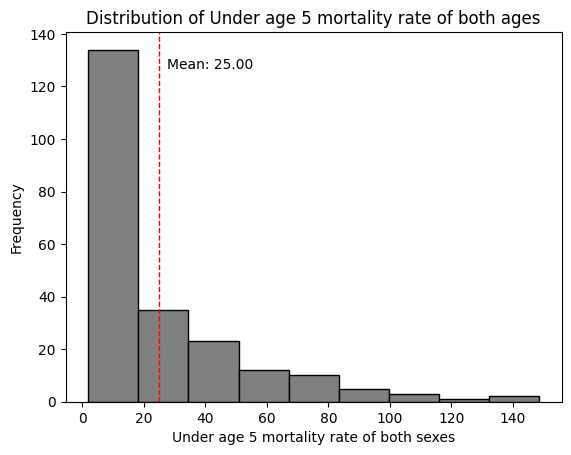

In [17]:
#Distribution of Under age 5 mortality rate of both sexes
census_2024['UMBS'].hist(grid=False, bins=9,edgecolor='black',color="grey")
plt.axvline(census_2024['UMBS'].mean(), color='red', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(census_2024['UMBS'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(census_2024['UMBS'].mean()))
plt.xlabel('Under age 5 mortality rate of both sexes')
plt.ylabel('Frequency')
plt.title('Distribution of Under age 5 mortality rate of both ages')
plt.show()


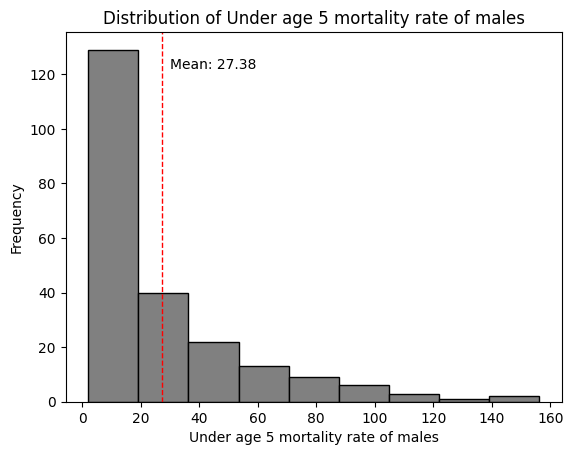

In [18]:
#Distribution of Under age 5 mortality rate of males
census_2024['UMM'].hist(grid=False, bins=9,edgecolor='black',color="grey")
plt.axvline(census_2024['UMM'].mean(), color='red', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(census_2024['UMM'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(census_2024['UMM'].mean()))
plt.xlabel('Under age 5 mortality rate of males')
plt.ylabel('Frequency')
plt.title('Distribution of Under age 5 mortality rate of males')
plt.show()

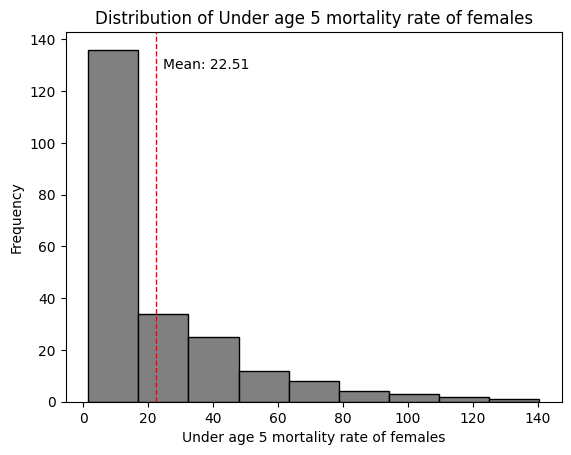

In [19]:
#Distribution of Under age 5 mortality rate of females
census_2024['UMF'].hist(grid=False, bins=9,edgecolor='black',color="grey")
plt.axvline(census_2024['UMF'].mean(), color='red', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(census_2024['UMF'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(census_2024['UMF'].mean()))
plt.xlabel('Under age 5 mortality rate of females')
plt.ylabel('Frequency')
plt.title('Distribution of Under age 5 mortality rate of females')
plt.show()

C:\Users\xyzsi\AppData\Local\Temp\ipykernel_7916\3201183894.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


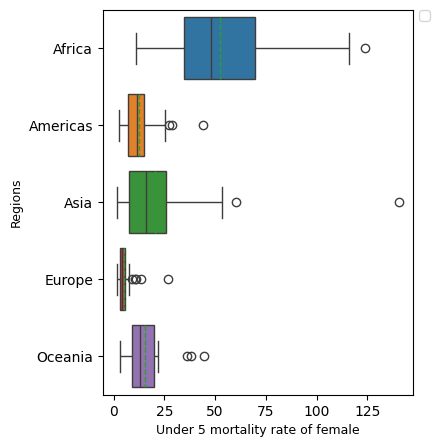

C:\Users\xyzsi\AppData\Local\Temp\ipykernel_7916\3201183894.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


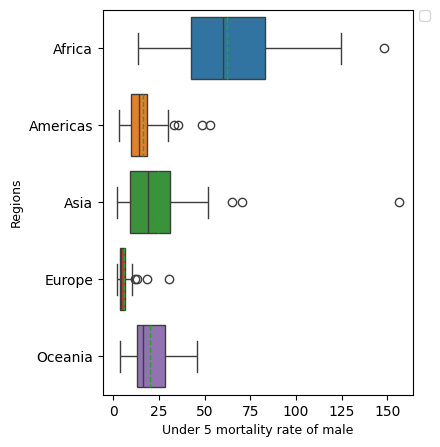

In [20]:
#boxplot showing differences of Under 5 mortality rate of females between regions
plt.figure(figsize=(4,5)) 
ax= sns.boxplot(x='UMF',y='Region' ,data=census_2024.sort_values(by="Region"),hue="Region",showmeans=True, meanline=True,dodge=False)
plt.xlabel("Under 5 mortality rate of female", fontsize=9)
plt.ylabel("Regions", fontsize=9)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#boxplot showing differences of Under 5 mortality rate of males between regions 
plt.figure(figsize=(4,5)) 
ax = sns.boxplot(x='UMM', y='Region', data=census_2024.sort_values(by="Region"),hue="Region",showmeans=True, meanline=True,dodge=False)
plt.xlabel("Under 5 mortality rate of male", fontsize=9)
plt.ylabel("Regions", fontsize=9)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [21]:
mean_lef=census_2024.groupby('Region')['LEF'].mean()
median_lef=census_2024.groupby('Region')['LEF'].median()
print(mean_lef,median_lef)

Region
Africa      69.453704
Americas    80.108163
Asia        78.267308
Europe      83.140816
Oceania     78.671429
Name: LEF, dtype: float64 Region
Africa      69.1
Americas    80.5
Asia        78.5
Europe      84.4
Oceania     78.7
Name: LEF, dtype: float64


In [22]:
print(census_2024.groupby('Region')['LEM'].mean(),census_2024.groupby('Region')['LEM'].median())


Region
Africa      65.396296
Americas    74.844898
Asia        73.465385
Europe      77.244898
Oceania     73.576190
Name: LEM, dtype: float64 Region
Africa      65.30
Americas    75.80
Asia        73.65
Europe      79.40
Oceania     74.00
Name: LEM, dtype: float64


In [23]:
print(census_2024.groupby('Region')['UMM'].mean(),census_2024.groupby('Region')['UMM'].median())

Region
Africa      62.298148
Americas    16.330612
Asia        24.436538
Europe       6.122449
Oceania     20.271429
Name: UMM, dtype: float64 Region
Africa      60.25
Americas    14.30
Asia        19.05
Europe       4.50
Oceania     16.50
Name: UMM, dtype: float64


In [24]:
print(census_2024.groupby('Region')['UMF'].mean(),census_2024.groupby('Region')['UMF'].median())

Region
Africa      52.174074
Americas    12.538776
Asia        20.332692
Europe       5.046939
Oceania     15.685714
Name: UMF, dtype: float64 Region
Africa      47.85
Americas    11.70
Asia        16.00
Europe       3.90
Oceania     12.80
Name: UMF, dtype: float64


##  Checking Homogenous or variables between different subregions


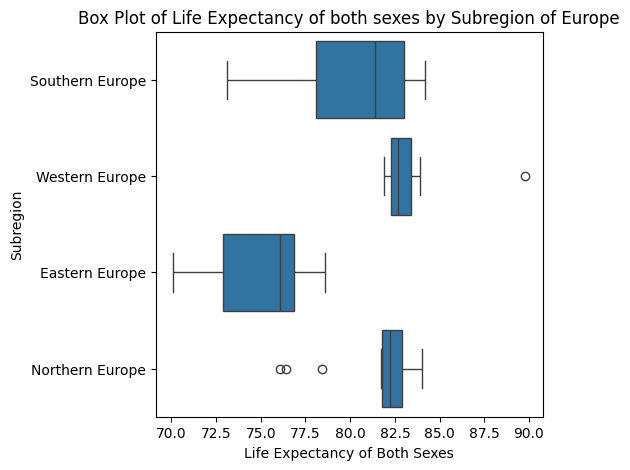

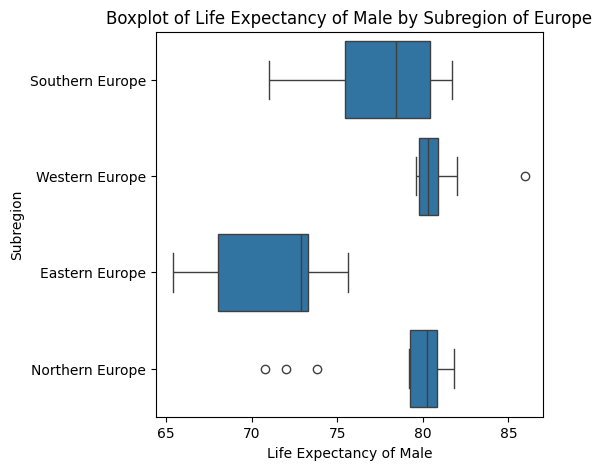

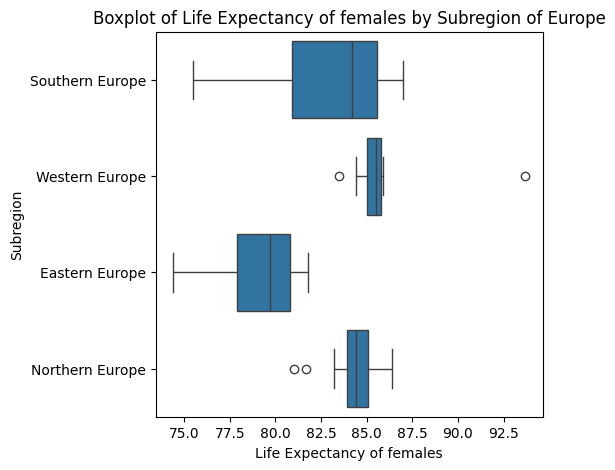

In [25]:
filtered_data = census_2024[census_2024['Region'].isin(['Europe'])]
plt.figure(figsize=(5, 5))


sns.boxplot(x='LEBS',y='Subregion', data=filtered_data)
plt.title('Box Plot of Life Expectancy of both sexes by Subregion of Europe')
plt.xlabel('Life Expectancy of Both Sexes')
plt.ylabel('Subregion')
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(x='LEM',y='Subregion',data=filtered_data)
plt.title('Boxplot of Life Expectancy of Male by Subregion of Europe')
plt.xlabel('Life Expectancy of Male')
plt.ylabel('Subregion')
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(x='LEF',y='Subregion',data=filtered_data)
plt.title('Boxplot of Life Expectancy of females by Subregion of Europe')
plt.xlabel('Life Expectancy of females')
plt.ylabel('Subregion')
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

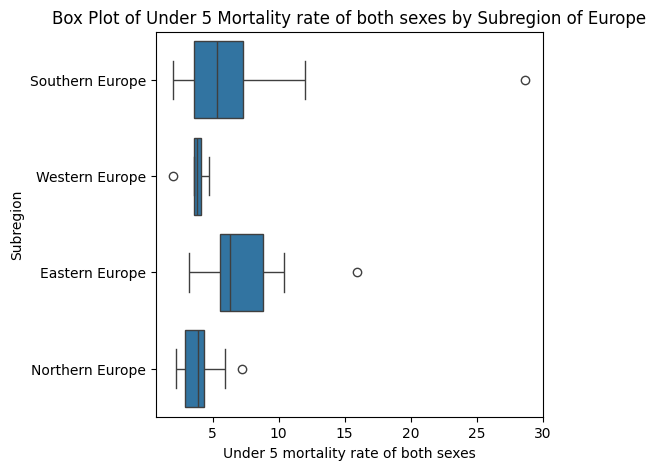

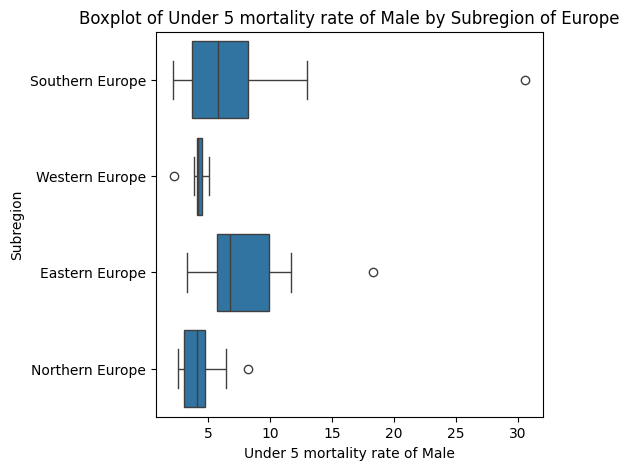

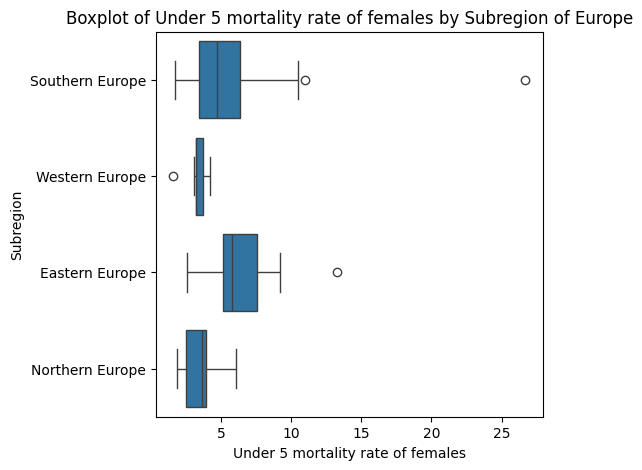

In [26]:
filtered_data = census_2024[census_2024['Region'].isin(['Europe'])]
plt.figure(figsize=(5, 5))


sns.boxplot(x='UMBS',y='Subregion', data=filtered_data)
plt.title('Box Plot of Under 5 Mortality rate of both sexes by Subregion of Europe')
plt.xlabel('Under 5 mortality rate of both sexes')
plt.ylabel('Subregion')
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(x='UMM',y='Subregion',data=filtered_data)
plt.title('Boxplot of Under 5 mortality rate of Male by Subregion of Europe')
plt.xlabel('Under 5 mortality rate of Male')
plt.ylabel('Subregion')
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(x='UMF',y='Subregion',data=filtered_data)
plt.title('Boxplot of Under 5 mortality rate of females by Subregion of Europe')
plt.xlabel('Under 5 mortality rate of females')
plt.ylabel('Subregion')
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [27]:


# Calculate LEBS,LEM,LEF, UMBS,UMM and UMF by subregion
subregions = filtered_data['Subregion'].unique()
for subregion in subregions:
    subregion_data = filtered_data[filtered_data['Subregion'] == subregion]
    
    iqr_lebs = np.percentile(subregion_data['LEBS'], 75) - np.percentile(subregion_data['LEBS'], 25)
    iqr_lem = np.percentile(subregion_data['LEM'], 75) - np.percentile(subregion_data['LEM'], 25)
    iqr_lef = np.percentile(subregion_data['LEF'], 75) - np.percentile(subregion_data['LEF'], 25)
    
    iqr_umbs = np.percentile(subregion_data['UMBS'], 75) - np.percentile(subregion_data['UMBS'], 25)
    iqr_umm = np.percentile(subregion_data['UMM'], 75) - np.percentile(subregion_data['UMM'], 25)
    iqr_umf = np.percentile(subregion_data['UMF'], 75) - np.percentile(subregion_data['UMF'], 25)
    #iqr_imr = np.percentile(subregion_data['IMRBS'], 75) - np.percentile(subregion_data['IMRBS'], 25)
    
    
    print(f'IQR for {subregion} - LEBS: {iqr_lebs}, LEM: {iqr_lem}, LEF: {iqr_lef}, UMBS: {iqr_umbs}, UMM: {iqr_umm}, UMF:{iqr_umf}')

IQR for Southern Europe - LEBS: 4.924999999999997, LEM: 4.950000000000003, LEF: 4.650000000000006, UMBS: 3.749999999999999, UMM: 4.5, UMF:2.8749999999999996
IQR for Western Europe - LEBS: 1.1000000000000085, LEM: 1.1000000000000085, LEF: 0.7999999999999972, UMBS: 0.49999999999999956, UMM: 0.40000000000000036, UMF:0.5
IQR for Eastern Europe - LEBS: 3.950000000000003, LEM: 5.275000000000006, LEF: 2.9250000000000114, UMBS: 3.250000000000001, UMM: 4.149999999999999, UMF:2.425
IQR for Northern Europe - LEBS: 1.125, LEM: 1.6250000000000142, LEF: 1.125, UMBS: 1.4749999999999996, UMM: 1.6999999999999997, UMF:1.4500000000000002


## Heterogrniety

In [28]:

# Calculate LEBS,LEM,LEF, UMBS,UMM and UMF by subregion
subregions = filtered_data['Subregion'].unique()
for subregion in subregions:
    subregion_data = filtered_data[filtered_data['Subregion'] == subregion]
    
    mean_lebs =subregion_data['LEBS'].mean()
    mean_lem = subregion_data['LEM'].mean()
    mean_lef = subregion_data['LEF'].mean()
    
    mean_umbs = subregion_data['UMBS'].mean()
    mean_umm = subregion_data['UMM'].mean()
    mean_umf = subregion_data['UMF'].mean()
     
    print(f'Mean for {subregion} - LEBS: {mean_lebs}, LEM: {mean_lem}, LEF: {mean_lef}, UMBS: {mean_umbs}, UMM: {mean_umm}, UMF:{mean_umf}')

Mean for Southern Europe - LEBS: 80.28125, LEM: 77.73125, LEF: 83.025, UMBS: 7.0, UMM: 7.5, UMF:6.44375
Mean for Western Europe - LEBS: 83.5, LEM: 81.01111111111112, LEF: 86.11111111111111, UMBS: 3.7333333333333334, UMM: 4.122222222222223, UMF:3.2777777777777777
Mean for Eastern Europe - LEBS: 74.91, LEM: 71.0, LEF: 79.05, UMBS: 7.380000000000001, UMM: 8.180000000000001, UMF:6.519999999999999
Mean for Northern Europe - LEBS: 81.42857142857143, LEM: 78.72857142857143, LEF: 84.2857142857143, UMBS: 3.9714285714285715, UMM: 4.364285714285713, UMF:3.5357142857142856


In [29]:
from scipy.stats import f_oneway
variables = [ 'LEBS', 'LEM','LEF','UMBS','UMM','UMF']

C:\Users\xyzsi\AppData\Local\Temp\ipykernel_7916\2305882973.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(box_data, labels=subregions)
C:\Users\xyzsi\AppData\Local\Temp\ipykernel_7916\2305882973.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(box_data, labels=subregions)
C:\Users\xyzsi\AppData\Local\Temp\ipykernel_7916\2305882973.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(box_data, labels=subregions)
C:\Users\xyzsi\AppData\Local\Temp\ipykernel_7916\2305882973.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since 

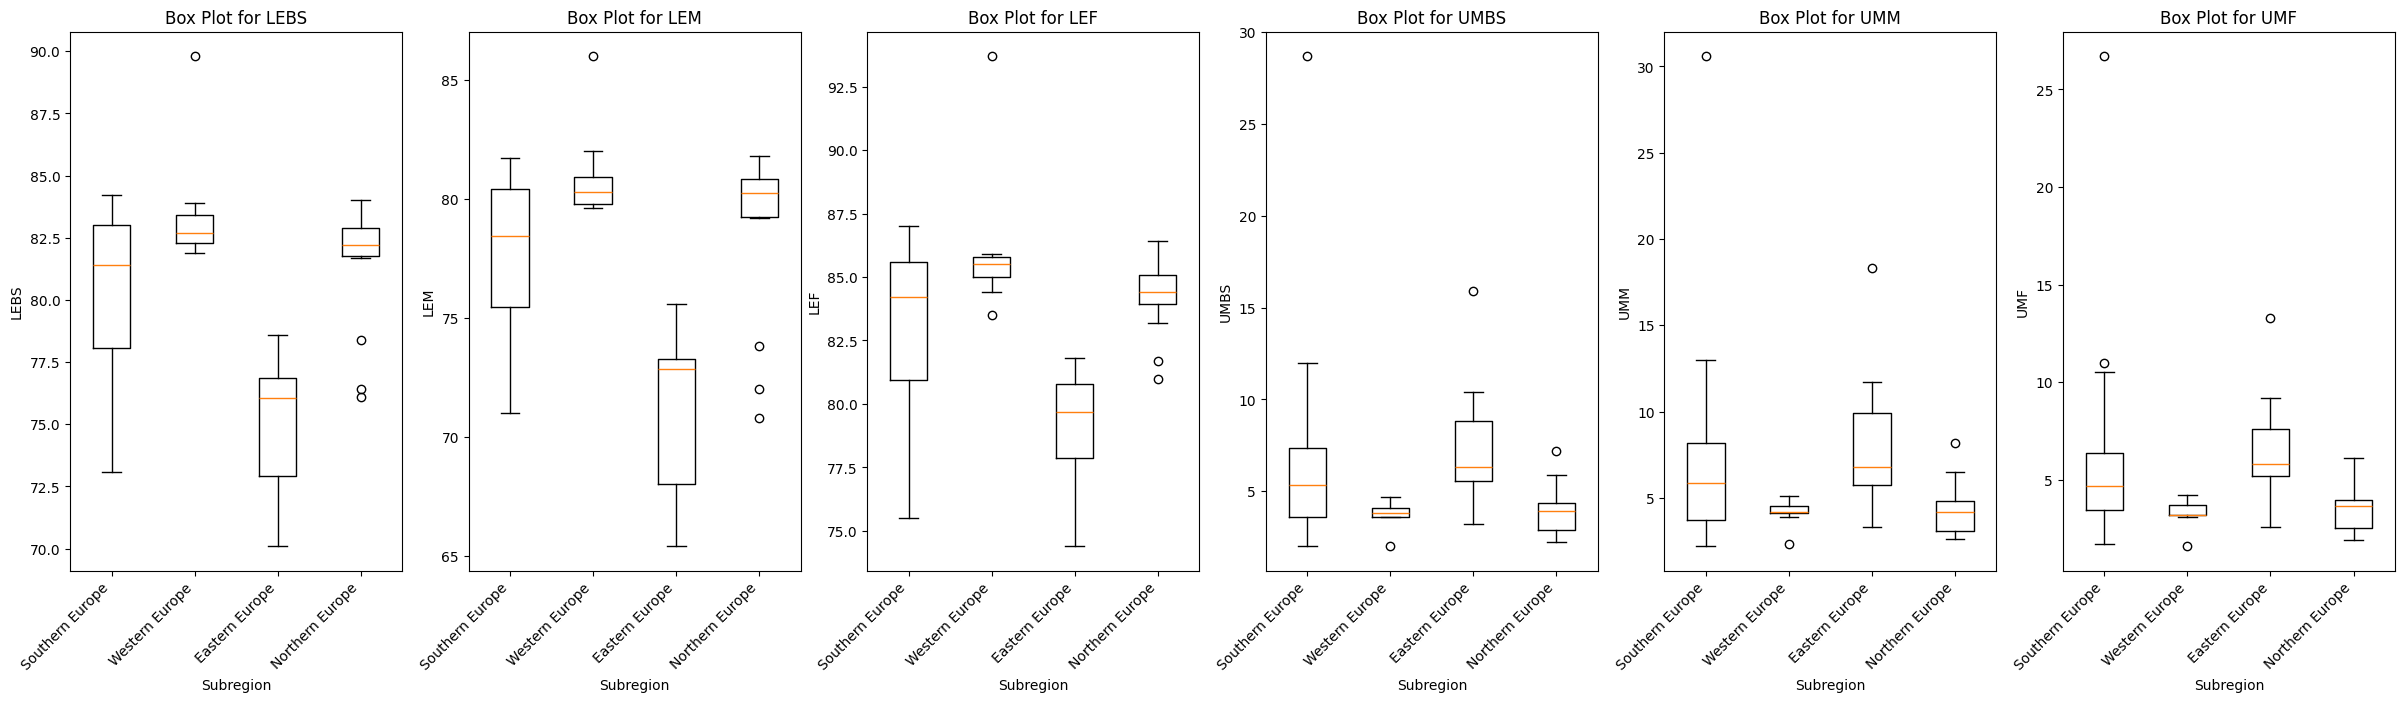

ANOVA results for 'LEBS':
F-statistic: 16.04
P-value: 0.0000
There are significant differences in LEBS between subregions.
ANOVA results for 'LEM':
F-statistic: 17.15
P-value: 0.0000
There are significant differences in LEM between subregions.
ANOVA results for 'LEF':
F-statistic: 12.54
P-value: 0.0000
There are significant differences in LEF between subregions.
ANOVA results for 'UMBS':
F-statistic: 2.56
P-value: 0.0667
No significant differences in UMBS between subregions.
ANOVA results for 'UMM':
F-statistic: 2.51
P-value: 0.0709
No significant differences in UMM between subregions.
ANOVA results for 'UMF':
F-statistic: 2.61
P-value: 0.0632
No significant differences in UMF between subregions.


In [30]:
fig, axs = plt.subplots(1, len(variables), figsize=(30, 7))
for i, variable in enumerate(variables):
    ax = axs[i]
    subregions = filtered_data['Subregion'].unique()

    # Create box plots for each subregion
    box_data = [filtered_data[filtered_data['Subregion'] == subregion][variable] for subregion in subregions]
    ax.boxplot(box_data, labels=subregions)
    ax.set_title(f'Box Plot for {variable}')
    ax.set_xlabel('Subregion')
    ax.set_ylabel(variable)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Step 2: Compare Measures of Central Tendency Between Different Subregions
for variable in variables:
    subregions = filtered_data['Subregion'].unique()
    data_groups = [filtered_data[filtered_data['Subregion'] == subregion][variable] for subregion in subregions]

    f_statistic, p_value = f_oneway(*data_groups)
    print(f"ANOVA results for '{variable}':")
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print(f"There are significant differences in {variable} between subregions.")
    else:
        print(f"No significant differences in {variable} between subregions.")

In [31]:
for variable in variables:
    print(f"Variance in {variable} within subregions:")
    subregions = filtered_data['Subregion'].unique()
    
    variances = []
    
    for subregion in subregions:
        subregion_data = filtered_data[filtered_data['Subregion'] == subregion][variable]
        standard_deviation = np.std(subregion_data, ddof=1)  # Use ddof=1 for sample variance
        variances.append(standard_deviation)
        
        print(f"Subregion {subregion}: Variance = {standard_deviation:.2f}")

    overall_variance = np.std(filtered_data[variable], ddof=1)
    print(f"Overall Variance of {variable}: {overall_variance:.2f}")
    
    # Check for homogeneity by comparing variances
    if all(abs( standard_deviation- overall_variance) <= 0.01 for variance in variances):
        print(f"The variances are similar within and between subregions for {variable}.")
    else:
        print(f"The variances are not similar within and between subregions for {variable}.")
    print()

Variance in LEBS within subregions:
Subregion Southern Europe: Variance = 3.29
Subregion Western Europe: Variance = 2.45
Subregion Eastern Europe: Variance = 2.95
Subregion Northern Europe: Variance = 2.54
Overall Variance of LEBS: 4.01
The variances are not similar within and between subregions for LEBS.

Variance in LEM within subregions:
Subregion Southern Europe: Variance = 3.29
Subregion Western Europe: Variance = 2.02
Subregion Eastern Europe: Variance = 3.57
Subregion Northern Europe: Variance = 3.66
Overall Variance of LEM: 4.64
The variances are not similar within and between subregions for LEM.

Variance in LEF within subregions:
Subregion Southern Europe: Variance = 3.31
Subregion Western Europe: Variance = 2.95
Subregion Eastern Europe: Variance = 2.42
Subregion Northern Europe: Variance = 1.53
Overall Variance of LEF: 3.48
The variances are not similar within and between subregions for LEF.

Variance in UMBS within subregions:
Subregion Southern Europe: Variance = 6.39
Sub

In [32]:
for variable in variables:
    print(f"Mean in {variable} within subregions:")
    subregions = filtered_data['Subregion'].unique()
    
    means = []
    
    for subregion in subregions:
        subregion_data = filtered_data[filtered_data['Subregion'] == subregion][variable]
        mean = np.mean(subregion_data)
        means.append(mean)
        
        print(f"Subregion {subregion}: Mean = {mean:.2f}")

    overall_mean = np.mean(filtered_data[variable])
    print(f"Overall Mean of {variable}: {overall_mean:.2f}")
    
    # Check for homogeneity by comparing means
    if all(abs(mean - overall_mean) <= 0.01 for mean in means):
        print(f"The means are similar within and between subregions for {variable}.")
    else:
        print(f"The means are not similar within and between subregions for {variable}.")
    print()

Mean in LEBS within subregions:
Subregion Southern Europe: Mean = 80.28
Subregion Western Europe: Mean = 83.50
Subregion Eastern Europe: Mean = 74.91
Subregion Northern Europe: Mean = 81.43
Overall Mean of LEBS: 80.10
The means are not similar within and between subregions for LEBS.

Mean in LEM within subregions:
Subregion Southern Europe: Mean = 77.73
Subregion Western Europe: Mean = 81.01
Subregion Eastern Europe: Mean = 71.00
Subregion Northern Europe: Mean = 78.73
Overall Mean of LEM: 77.24
The means are not similar within and between subregions for LEM.

Mean in LEF within subregions:
Subregion Southern Europe: Mean = 83.03
Subregion Western Europe: Mean = 86.11
Subregion Eastern Europe: Mean = 79.05
Subregion Northern Europe: Mean = 84.29
Overall Mean of LEF: 83.14
The means are not similar within and between subregions for LEF.

Mean in UMBS within subregions:
Subregion Southern Europe: Mean = 7.00
Subregion Western Europe: Mean = 3.73
Subregion Eastern Europe: Mean = 7.38
Subr

## Bivariate Correlation between variables


In [46]:
correlation_pearson = census_2024['LEM'].corr(census_2024['UMM'], method='pearson')  # Pearson correlation
correlation_spearman = census_2024['LEM'].corr(census_2024['UMM'], method='spearman')  # Spearman correlation

print("Pearson Correlation:", correlation_pearson)


Pearson Correlation: -0.866472680622114


In [35]:
census_2024[['LEBS','LEM','LEF','UMBS','UMF','UMM']].corr()

,LEBS,LEM,LEF,UMBS,UMF,UMM
LEBS,1.000000,0.991986,0.992008,-0.889654,-0.888383,-0.887954
LEM,0.991986,1.000000,0.968196,-0.866392,-0.863037,-0.866473
LEF,0.992008,0.968196,1.000000,-0.899427,-0.900165,-0.896058
UMBS,-0.889654,-0.866392,-0.899427,1.000000,0.997947,0.998570
UMF,-0.888383,-0.863037,-0.900165,0.997947,1.000000,0.993101
UMM,-0.887954,-0.866473,-0.896058,0.998570,0.993101,1.000000


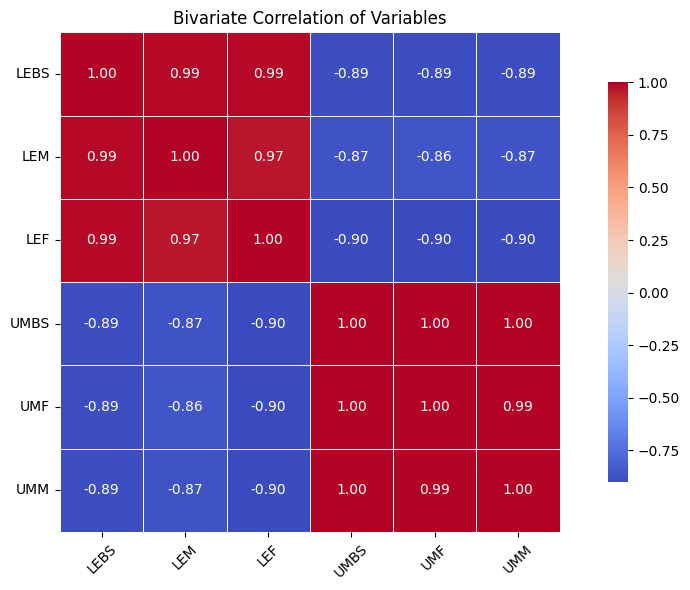

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your census_2024 DataFrame already defined
# Calculate the correlation matrix
correlation_matrix = census_2024[['LEBS', 'LEM', 'LEF', 'UMBS', 'UMF', 'UMM']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, 
            annot=True,               # Show correlation values
            fmt=".2f",               # Format to 2 decimal places
            cmap='coolwarm',         # Color map
            square=True,             # Square cells
            linewidths=0.5,         # Line width between cells
            cbar_kws={"shrink": .8}) # Color bar size

# Add titles and labels
plt.title('Bivariate Correlation of Variables', fontsize=12)
plt.xticks(rotation=45)      # Rotate x-tick labels for better visibility
plt.yticks(rotation=0)       # Keep y-tick labels horizontal
plt.tight_layout()           # Adjust layout to prevent clipping

# Show the plot
plt.show()


In [37]:
#creating sub dataframe filtered using the year 2003
census_2004=pd.DataFrame(census_data.loc[census_data['Year']==2004]).copy()

In [38]:
for variable in variables:
    mean_2004= census_2004[variable].mean()
    mean_2024= census_2024[variable].mean()
    print(f"The mean of {variable} for the year 2004 is : Mean = {mean_2004:.2f} and 2024 is : Mean= {mean_2024:.2f}")
    

The mean of LEBS for the year 2004 is : Mean = 69.66 and 2024 is : Mean= 75.10
The mean of LEM for the year 2004 is : Mean = 67.34 and 2024 is : Mean= 72.66
The mean of LEF for the year 2004 is : Mean = 72.10 and 2024 is : Mean= 77.65
The mean of UMBS for the year 2004 is : Mean = 45.06 and 2024 is : Mean= 25.00
The mean of UMM for the year 2004 is : Mean = 48.23 and 2024 is : Mean= 27.38
The mean of UMF for the year 2004 is : Mean = 41.75 and 2024 is : Mean= 22.51


In [39]:
for variable in variables:
    median_2004= census_2004[variable].median()
    median_2024= census_2024[variable].median()
    print(f"The median of {variable} for the year 2004 is {median_2004:.2f} and 2024 is {median_2024:.2f}")

The median of LEBS for the year 2004 is 72.30 and 2024 is 76.20
The median of LEM for the year 2004 is 69.60 and 2024 is 73.50
The median of LEF for the year 2004 is 74.83 and 2024 is 78.80
The median of UMBS for the year 2004 is 24.40 and 2024 is 13.90
The median of UMM for the year 2004 is 27.10 and 2024 is 16.40
The median of UMF for the year 2004 is 22.30 and 2024 is 12.60


In [40]:
for variable in variables:
    mean_change = (census_2024[variable].mean()- census_2004[variable].mean())/census_2004[variable].mean()*100
    print(f" The change in mean of {variable} during 20 years is {mean_change:.2f}")
   

 The change in mean of LEBS during 20 years is 7.81
 The change in mean of LEM during 20 years is 7.90
 The change in mean of LEF during 20 years is 7.70
 The change in mean of UMBS during 20 years is -44.51
 The change in mean of UMM during 20 years is -43.23
 The change in mean of UMF during 20 years is -46.07


In [41]:
from scipy.stats import ttest_rel
for variable in variables:
    t_stat, p_value = ttest_rel(census_2004[variable], census_2024[variable])
    print(f" The t-statistic of {variable} is {t_stat:.2f} and p-value of {variable} is {p_value:.2f}")


 The t-statistic of LEBS is -22.42 and p-value of LEBS is 0.00
 The t-statistic of LEM is -22.71 and p-value of LEM is 0.00
 The t-statistic of LEF is -21.67 and p-value of LEF is 0.00
 The t-statistic of UMBS is 12.19 and p-value of UMBS is 0.00
 The t-statistic of UMM is 12.29 and p-value of UMM is 0.00
 The t-statistic of UMF is 12.04 and p-value of UMF is 0.00


In [42]:
census_2004.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 0 to 226
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       225 non-null    object 
 1   Year       225 non-null    int64  
 2   LEBS       225 non-null    float64
 3   LEM        225 non-null    float64
 4   LEF        225 non-null    float64
 5   UMBS       225 non-null    float64
 6   UMM        225 non-null    float64
 7   UMF        225 non-null    float64
 8   Subregion  225 non-null    object 
 9   Region     225 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 19.3+ KB


In [43]:
census_2024['Subregion'].unique()

array(['South-Central Asia', 'Southern Europe', 'Northern Africa',
       'Polynesia', 'Middle Africa', 'Caribbean', 'South America',
       'Western Asia', 'Australia/New Zealand', 'Western Europe',
       'Eastern Europe', 'Central America', 'Western Africa',
       'Northern America', 'Southern Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Asia', 'Northern Europe', 'Melanesia',
       'Micronesia'], dtype=object)

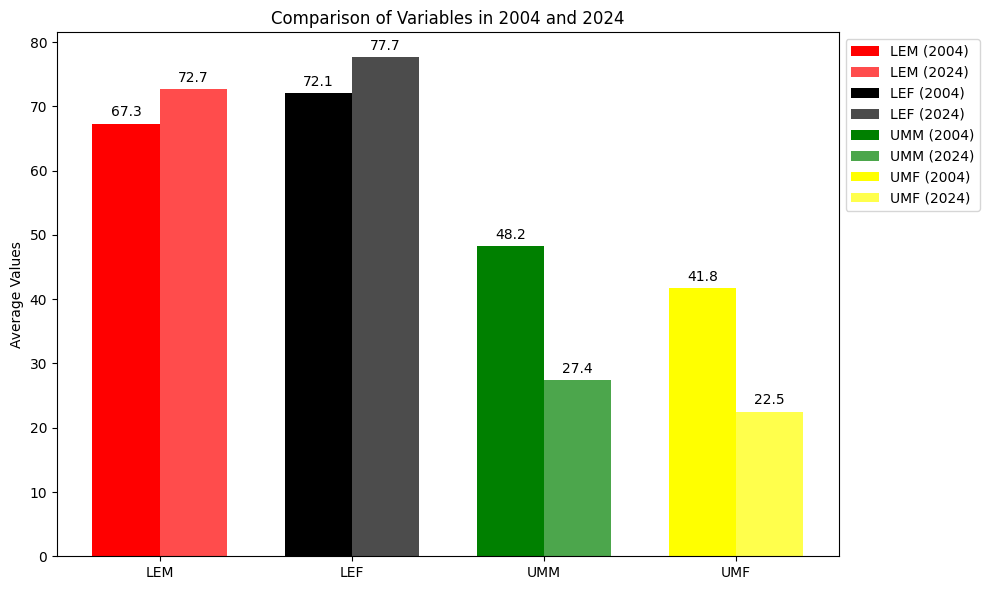

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace these with your actual census_2004 and census_2024 data)
# Using random values for demonstration; replace with actual averages
# For example, replace np.mean(census_2004['LEM']) with your actual data


# Calculate mean values for each variable
values_2004 = [
    np.mean(census_2004['LEM']),  # Life Expectancy of Male in 2004
    np.mean(census_2004['LEF']),  # Life Expectancy of Female in 2004
    np.mean(census_2004['UMM']),  # Under 5 Mortality Rate of Male in 2004
    np.mean(census_2004['UMF'])    # Under 5 Mortality Rate of Female in 2004
]

values_2024 = [
    np.mean(census_2024['LEM']),  # Life Expectancy of Male in 2024
    np.mean(census_2024['LEF']),  # Life Expectancy of Female in 2024
    np.mean(census_2024['UMM']),  # Under 5 Mortality Rate of Male in 2024
    np.mean(census_2024['UMF'])    # Under 5 Mortality Rate of Female in 2024
]

# Variables and colors
categories = ['LEM', 'LEF', 'UMM', 'UMF']  # Variable names
colors = ['red', 'black', 'green', 'yellow']  # Colors for each variable

# Set up the bar width and positions
bar_width = 0.35
index = np.arange(len(categories))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bars for each year
for i in range(len(categories)):
    ax.bar(index[i] - bar_width / 2, values_2004[i], bar_width, color=colors[i], label=f'{categories[i]} (2004)')
    ax.bar(index[i] + bar_width / 2, values_2024[i], bar_width, color=colors[i], alpha=0.7, label=f'{categories[i]} (2024)')

# Adding labels and title
ax.set_ylabel('Average Values')
ax.set_title('Comparison of Variables in 2004 and 2024')
ax.set_xticks(index)
ax.set_xticklabels(categories)  # X-ticks show variable names

# Add legend with variable names and colors
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Optional: Adding data labels on top of bars
def add_data_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',  # Display the height as a label
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label slightly above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding data labels for both years
add_data_labels(ax.patches[:len(categories)])
add_data_labels(ax.patches[len(categories):])

# Show the plot
plt.tight_layout()
plt.show()
